Homework 6 - Heather Turcios

# Exercise 8.1

In [66]:
import os
from glob import glob

import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import xarray as xr
import rioxarray as rxr

In [67]:
#Create the path to the data
pre_fire_path = os.path.join("data", "pre-woolsey-fire")
post_fire_path = os.path.join("data", "post-woolsey-fire")

In [68]:
#Get list of all pre-cropped data and sort the data

#Generate a list of tif files
pre_fire_paths = glob(os.path.join(pre_fire_path, 
                                   "*_B*.tiff"))
post_fire_paths = glob(os.path.join(post_fire_path, 
                                   "*_B*.tiff"))

#Sort the data to ensure bands are in the correct order
pre_fire_paths.sort()
pre_fire_paths

['data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/pre-woolsey-fire/2018-05-14-00:00_2018-05-14-23:59_Sentinel-2_L2A_B12_(Raw).tiff',
 'data/pre

In [69]:
post_fire_paths.sort()
post_fire_paths

['data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B01_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B02_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B03_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B04_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B05_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B06_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B07_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B08_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B09_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B11_(Raw).tiff',
 'data/post-woolsey-fire/2019-02-08-00:00_2019-02-08-23:59_Sentinel-2_L2A_B12_(Raw).tiff',

In [70]:
def open_clean_bands(band_path):
    """A function that opens a Landsat band as an (rio)xarray object

    Parameters
    ----------
    band_path : list
        A list of paths to the tif files that you wish to combine.
        
    Returns
    -------
    An single xarray object with the Landsat band data.

    """
     
    return rxr.open_rasterio(band_path, masked=True).squeeze()

In [71]:
#Open all bands in a loop
all_bands = []
for i, aband in enumerate(pre_fire_paths):
    all_bands.append(open_clean_bands(aband))
    #Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

In [72]:
#Turn list of bands into a single xarray object  - preserving geospatial data  
landsat_pre_fire_xr = xr.concat(all_bands, dim="band") 
landsat_pre_fire_xr

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 13.,  16.,  20., ...,  47.,  43.,  57.],
        [ 16.,  19.,  15., ...,  58.,  36.,  49.],
        [ 20.,  19.,  13., ...,  54.,  30.,  37.],
        ...,
        [ 12.,  12.,  12., ...,  23.,  24.,  27.],
        [ 12.,  11.,  12., ...,  27.,  27.,  26.],
        [ 12.,  12.,  12., ...,  24.,  24.,  27.]],

       [[ 18.,  20.,  25., ...,  58.,  47.,  63.],
        [ 21.,  24.,  17., ...,  76.,  40.,  53.],
        [ 26.,  24.,  16., ...,  65.,  34.,  35.],
        ...,
        [ 12.,  12.,  12., ...,  26.,  31.,  34.],
        [ 12.,  12.,  12., ...,  31.,  31.,  32.],
        [ 13.,  12.,  12., ...,  29.,  26.,  32.]],

       [[ 27.,  29.,  31., ...,  61.,  50.,  66.],
        [ 30.,  29.,  20., ...,  82.,  42.,  55.],
        [ 33.,  30.,  18., ...,  71.,  38.,  40.],
        ...,
...
        ...,
        [  7.,   7.,   7., ...,  51.,  58.,  59.],
        [  7.,   7.,   7., ...,  57.,  59.,  63.],
        [  8.,   7.,   7., ...,  56.,  53.,  52.]],

       [[ 60.,  66.,  98., ...,  80.,  50.,  61.],
        [ 71.,  93.,  55., ...,  74.,  47.,  51.],
        [ 96.,  97.,  45., ...,  66.,  52.,  56.],
        ...,
        [  7.,   7.,   7., ...,  44.,  50.,  47.],
        [  7.,   6.,   7., ...,  51.,  52.,  56.],
        [  7.,   7.,   6., ...,  48.,  45.,  44.]],

       [[ 95.,  89.,  59., ...,  63.,  63.,  84.],
        [ 91.,  62.,  36., ...,  91.,  51.,  65.],
        [ 69.,  61.,  32., ...,  77.,  51.,  69.],
        ...,
        [  8.,   8.,   8., ...,  55.,  62.,  70.],
        [  8.,   7.,   8., ...,  60.,  64.,  63.],
        [  8.,   7.,   7., ...,  63.,  60.,  55.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

In [73]:
#Open all bands in a loop
all_bands = []
for i, aband in enumerate(post_fire_paths):
    all_bands.append(open_clean_bands(aband))
    #Assign a band number to the new xarray object
    all_bands[i]["band"]=i+1

In [74]:
#Turn list of bands into a single xarray object  - preserving geospatial data  
landsat_post_fire_xr = xr.concat(all_bands, dim="band") 
landsat_post_fire_xr

<xarray.DataArray (band: 12, y: 337, x: 625)>
array([[[ 0.,  2.,  8., ..., 37., 30., 34.],
        [ 3.,  8.,  7., ..., 46., 26., 31.],
        [10.,  8.,  8., ..., 44., 22., 19.],
        ...,
        [ 0.,  0.,  0., ..., 13., 15., 21.],
        [ 0.,  0.,  0., ..., 15., 17., 18.],
        [ 0.,  0.,  0., ..., 16., 15., 17.]],

       [[ 4.,  6., 15., ..., 43., 37., 41.],
        [ 6., 14., 14., ..., 61., 33., 44.],
        [18., 14., 13., ..., 54., 28., 26.],
        ...,
        [ 1.,  1.,  1., ..., 18., 20., 31.],
        [ 1.,  1.,  1., ..., 18., 20., 25.],
        [ 1.,  1.,  1., ..., 22., 17., 23.]],

       [[10., 12., 23., ..., 46., 41., 46.],
        [12., 22., 22., ..., 67., 36., 45.],
        [27., 22., 22., ..., 59., 32., 30.],
        ...,
...
        ...,
        [ 0.,  0.,  0., ..., 36., 40., 43.],
        [ 0.,  0.,  0., ..., 37., 40., 47.],
        [ 0.,  0.,  0., ..., 42., 35., 36.]],

       [[29., 35., 65., ..., 48., 48., 49.],
        [37., 65., 63., ..., 53., 38., 35.],
        [73., 64., 62., ..., 51., 44., 44.],
        ...,
        [ 0.,  0.,  0., ..., 30., 34., 33.],
        [ 0.,  0.,  0., ..., 32., 34., 41.],
        [ 0.,  0.,  0., ..., 36., 29., 30.]],

       [[69., 68., 61., ..., 47., 46., 53.],
        [68., 59., 63., ..., 72., 42., 45.],
        [62., 61., 63., ..., 67., 41., 46.],
        ...,
        [ 0.,  0.,  0., ..., 42., 46., 52.],
        [ 0.,  0.,  0., ..., 44., 52., 50.],
        [ 0.,  0.,  0., ..., 48., 44., 41.]]], dtype=float32)
Coordinates:
  * band         (band) int64 1 2 3 4 5 6 7 8 9 10 11 12
  * x            (x) float64 -119.1 -119.1 -119.1 ... -118.5 -118.5 -118.5
  * y            (y) float64 34.27 34.27 34.27 34.27 ... 34.0 34.0 34.0 34.0
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:           Area
    TIFFTAG_RESOLUTIONUNIT:  1 (unitless)
    TIFFTAG_XRESOLUTION:     1
    TIFFTAG_YRESOLUTION:     1
    scale_factor:            1.0
    add_offset:              0.0

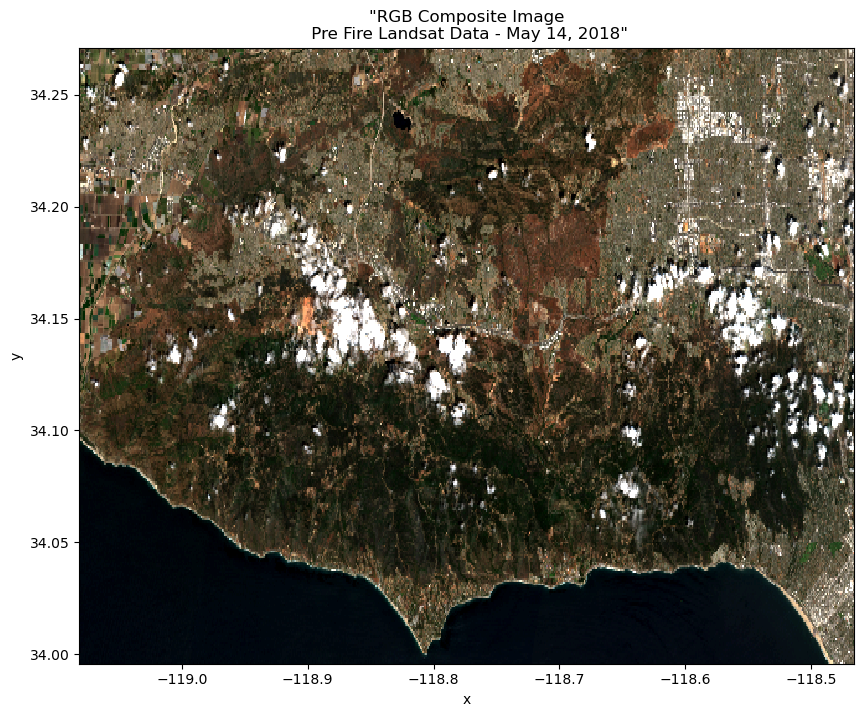

In [75]:
#Plot data for the pre fire
landsat_rgb_pre = (landsat_pre_fire_xr[[3,2,1],:,:])
landsat_rgb_pre.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Pre Fire Landsat Data - May 14, 2018"')
plt.show()

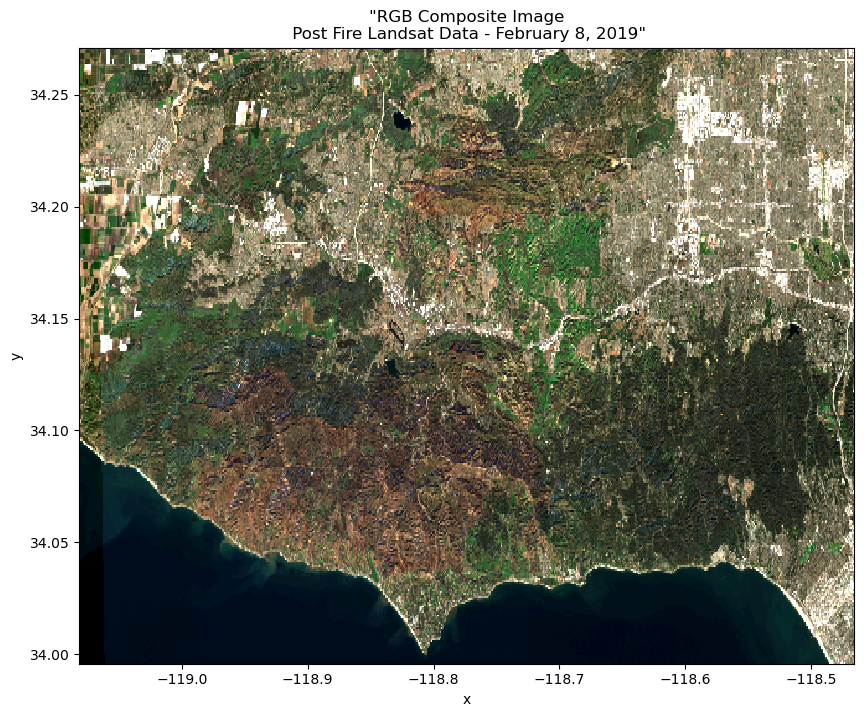

In [76]:
#Plot Post Fire data
landsat_rgb_post = (landsat_post_fire_xr[[3,2,1],:,:])
landsat_rgb_post.plot.imshow(rgb="band",robust = True, figsize=(10, 8))
plt.title('"RGB Composite Image\n Post Fire Landsat Data - February 8, 2019"')
plt.show()

In [77]:
#Calculate NDVI for Pre Fire
ndvi_pre = (landsat_pre_fire_xr[7] - landsat_pre_fire_xr[3])/(landsat_pre_fire_xr[7] + landsat_pre_fire_xr[3])

In [78]:
#Calculate NDVI for Post Fire
ndvi_post = (landsat_post_fire_xr[7] - landsat_post_fire_xr[3])/(landsat_post_fire_xr[7] + landsat_post_fire_xr[3])

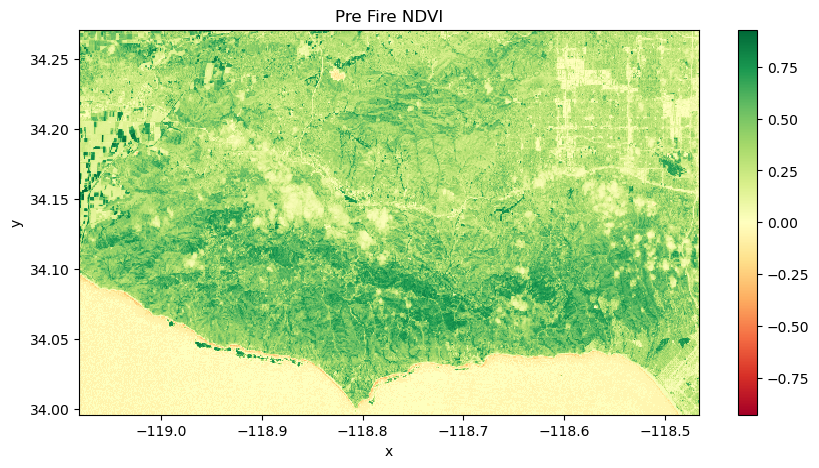

In [79]:
#Plot Pre Fire NDVI Data
f, ax = plt.subplots(figsize=(10, 5))
ndvi_pre.plot(cmap="RdYlGn")
plt.title("Pre Fire NDVI")
plt.show()

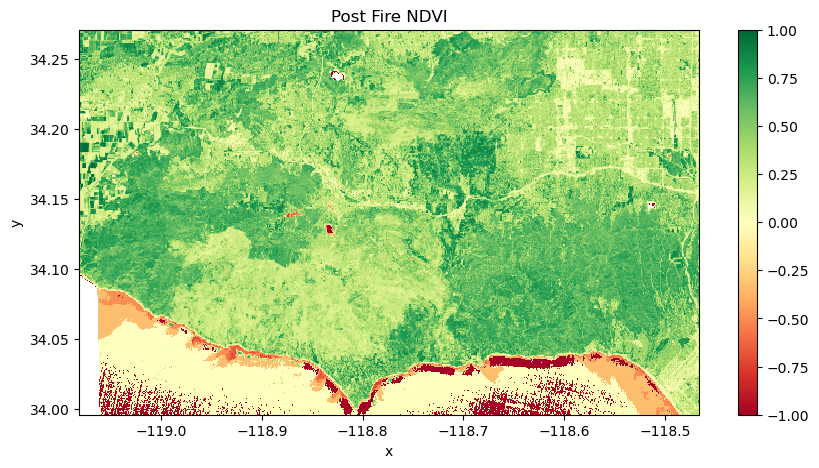

In [80]:
#Plot Post Fire NDVI Data
f, ax = plt.subplots(figsize=(10, 5))
ndvi_post.plot(cmap="RdYlGn")
plt.title("Post Fire NDVI")
plt.show()

Looking at the maps, the biggest difference is the coloration. Obviously for the RGB maps, they show our information in real life colors where the NDVI is classifying area per the colors assigned. The NDVI is great to show the water areas in the map but they are a bit harder to tell on the RGB maps. The NDVI maps helps show the mountain ranges and elevation a bit more than the RGB maps, but the NDVI doesn't do a good job of showing the area was burned with a fire.